In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from pylab import rcParams

%matplotlib inline
params = {'axes.labelsize': 14,'axes.titlesize':14, 'text.fontsize': 14, 'legend.fontsize': 14,
          'xtick.labelsize': 13, 'ytick.labelsize': 14}
rcParams['figure.figsize'] = 6.5, 4

matplotlib.rcParams.update(params)

C:\Users\John\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\John\Anaconda3\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


In [2]:
data = pd.read_csv('C:/Users/John/Desktop/DM/Data Mining VU data/training_set_VU_DM_2014.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A606D14CC0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6085E72B0>]], dtype=object)

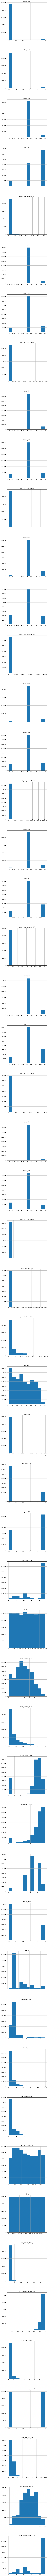

In [3]:
data.hist(data.columns.values,figsize=(8,10*len(data.columns)),layout=(len(data.columns),1))

In [4]:
##Filter outliers - drop NULLs if necessary

#booking_bool
data["booking_bool"] = data["booking_bool"][~pd.isnull(data["booking_bool"])]

#click_bool
data["click_bool"] = data["click_bool"][~pd.isnull(data["click_bool"])]

#comp1_rate_percent_off
data["comp1_rate_percent_diff"] = data["comp1_rate_percent_diff"][pd.isnull(data["comp1_rate_percent_diff"]) | data["comp1_rate_percent_diff"]<data["comp1_rate_percent_diff"].quantile(0.99)]

#comp2_rate_percent_off
data["comp2_rate_percent_diff"] = data["comp2_rate_percent_diff"][pd.isnull(data["comp2_rate_percent_diff"]) | data["comp2_rate_percent_diff"]<data["comp2_rate_percent_diff"].quantile(0.99)]

#comp3_rate_percent_off
data["comp3_rate_percent_diff"] = data["comp3_rate_percent_diff"][pd.isnull(data["comp3_rate_percent_diff"]) | data["comp3_rate_percent_diff"]<data["comp3_rate_percent_diff"].quantile(0.99)]

#comp4_rate_percent_off
data["comp4_rate_percent_diff"] = data["comp4_rate_percent_diff"][pd.isnull(data["comp4_rate_percent_diff"]) | data["comp4_rate_percent_diff"]<data["comp4_rate_percent_diff"].quantile(0.99)]

#comp5_rate_percent_off
data["comp5_rate_percent_diff"] = data["comp5_rate_percent_diff"][pd.isnull(data["comp5_rate_percent_diff"]) | data["comp5_rate_percent_diff"]<data["comp5_rate_percent_diff"].quantile(0.99)]

#comp6_rate_percent_off
data["comp6_rate_percent_diff"] = data["comp6_rate_percent_diff"][pd.isnull(data["comp6_rate_percent_diff"]) | data["comp6_rate_percent_diff"]<data["comp6_rate_percent_diff"].quantile(0.99)]

#comp7_rate_percent_off
data["comp7_rate_percent_diff"] = data["comp7_rate_percent_diff"][pd.isnull(data["comp7_rate_percent_diff"]) | data["comp7_rate_percent_diff"]<data["comp7_rate_percent_diff"].quantile(0.99)]

#comp8_rate_percent_off
data["comp8_rate_percent_diff"] = data["comp8_rate_percent_diff"][pd.isnull(data["comp8_rate_percent_diff"]) | data["comp8_rate_percent_diff"]<data["comp8_rate_percent_diff"].quantile(0.99)]

#gross_bookings
data["gross_bookings_usd"] = data["gross_bookings_usd"][~pd.isnull(data["gross_bookings_usd"]) | data["gross_bookings_usd"]<data["gross_bookings_usd"].quantile(0.99)]

#orig_destination_distance
data["orig_destination_distance"] = data["orig_destination_distance"][~pd.isnull(data["orig_destination_distance"])]

#position
data["position"] = data["position"][~pd.isnull(data["position"])]

#price_usd
data["price_usd"] = data["price_usd"][~pd.isnull(data["price_usd"]) | data["price_usd"]<data["price_usd"].quantile(0.99)]

#promotion_flag
data["promotion_flag"] = data["promotion_flag"][~pd.isnull(data["promotion_flag"])]

#prop_brand_bool
data["prop_brand_bool"] = data["prop_brand_bool"][~pd.isnull(data["prop_brand_bool"])]

#prop_country_id
data["prop_country_id"] = data["prop_country_id"][~pd.isnull(data["prop_country_id"]) | data["prop_country_id"]<data["prop_country_id"].quantile(0.99)]

#prop_id
data["prop_id"] = data["prop_id"][~pd.isnull(data["prop_id"])]

#prop_location_score1
data["prop_location_score1"] = data["prop_location_score1"][~pd.isnull(data["prop_location_score1"])]

#prop_location_score2
data["prop_location_score2"] = data["prop_location_score2"][~pd.isnull(data["prop_location_score2"])]

#prop_log_historical_price
data["prop_log_historical_price"] = data["prop_log_historical_price"][~pd.isnull(data["prop_log_historical_price"])]

#prop_starrating
data["prop_starrating"] = data["prop_starrating"][~pd.isnull(data["prop_starrating"])]

#random_bool
data["random_bool"] = data["random_bool"][~pd.isnull(data["random_bool"])]

#site_id
data["site_id"] = data["site_id"][~pd.isnull(data["site_id"])]

#srch_adults_count
data["srch_adults_count"] = data["srch_adults_count"][~pd.isnull(data["srch_adults_count"])]

#srch_booking_window
data["srch_booking_window"] = data["srch_booking_window"][~pd.isnull(data["srch_booking_window"]) | data["srch_booking_window"]<data["srch_booking_window"].quantile(0.99)]

#srch_children_count
data["srch_children_count"] = data["srch_children_count"][~pd.isnull(data["srch_children_count"]) | data["srch_children_count"]<data["srch_children_count"].quantile(0.99)]

#srch_destination_id
data["srch_destination_id"] = data["srch_destination_id"][~pd.isnull(data["srch_destination_id"])]

#srch_id
data["srch_id"] = data["srch_id"][~pd.isnull(data["srch_id"])]

#srch_length_of_stay
data["srch_length_of_stay"] = data["srch_length_of_stay"][~pd.isnull(data["srch_length_of_stay"]) | data["srch_length_of_stay"]<data["srch_length_of_stay"].quantile(0.99)]

#srch_query_affinity_score
data["srch_query_affinity_score"] = data["srch_query_affinity_score"][pd.isnull(data["srch_query_affinity_score"]) | data["srch_query_affinity_score"]<data["srch_query_affinity_score"].quantile(0.99)]

#srch_room_count
data["srch_room_count"] = data["srch_room_count"][~pd.isnull(data["srch_room_count"]) | data["srch_room_count"]<data["srch_room_count"].quantile(0.99)]

#srch_saturday_night_bool
data["srch_saturday_night_bool"] = data["srch_saturday_night_bool"][~pd.isnull(data["srch_saturday_night_bool"])]

#visitor_hist_adr_usd
data["visitor_hist_adr_usd"] = data["visitor_hist_adr_usd"][pd.isnull(data["visitor_hist_adr_usd"]) | data["visitor_hist_adr_usd"]<data["visitor_hist_adr_usd"].quantile(0.99)]

#visitor_location_country_id
data["visitor_location_country_id"] = data["visitor_location_country_id"][~pd.isnull(data["visitor_location_country_id"])]

In [ ]:
##REFORMED HISTOGRAMS OF VARIABLES OF INTEREST

#position
plt.subplot(8,1,1)
data.iloc[:,14].hist(bins=10, figsize=(10,20))
plt.title("Position on Expedia")
plt.xlabel("Position")
plt.ylabel("Properties")

#click_bool
plt.subplot(8,1,2)
data.iloc[:,51].hist(bins=2, figsize=(10,20))
plt.title("Clicked on property")
plt.xlabel("No / Yes")
plt.ylabel("Properties")

#booking_bool
plt.subplot(8,1,3)
data.iloc[:,53].hist(bins=2, figsize=(10,20))
plt.title("Booking of property")
plt.xlabel("No / Yes")
plt.ylabel("Properties")

#gross_booking_usd
plt.subplot(8,1,4)
data.iloc[:,52] = data.iloc[:,52].dropna()
data.iloc[:,52] = data.iloc[:,52][data.iloc[:,52]<2000]
data.iloc[:,52].hist(bins=10, figsize=(10,20))
plt.title("Gross booking (in USD)")
plt.xlabel("Number of bookings")
plt.ylabel("Booking price")

#price_usd
plt.subplot(8,1,5)
data.iloc[:,15] = data.iloc[:,15].dropna()
data.iloc[:,15] = data.iloc[:,15][data.iloc[:,15]<750]
data.iloc[:,15].hist(bins=10, figsize=(10,20))
plt.title("Initial price (in USD)")
plt.xlabel("Number of bookings")
plt.ylabel("Initial price")

#promotion_flag
plt.subplot(8,1,6)
data.iloc[:,16].hist(bins=2, figsize=(10,20))
plt.title("Promotion")
plt.xlabel("No / Yes")
plt.ylabel("Properties")

#prop_starrating
plt.subplot(8,1,7)
data.iloc[:,8].hist(bins=5, figsize=(10,20))
plt.title("Hotel stars")
plt.xlabel("Star rating")
plt.ylabel("Properties")

#prop_review_score
plt.subplot(8,1,8)
data.iloc[:,9].hist(bins=5, figsize=(10,20))
plt.title("Hotel reviews")
plt.xlabel("Review rating")
plt.ylabel("Properties")

plt.tight_layout()
plt.show()

In [ ]:
for i in range(0,53):
    for j in range(i+1,53):
        print(data.iloc[:,i].corr(data.iloc[:,j]))